In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Creating dataframe from dataset

In [2]:
df = pd.read_csv('hr_employee_churn_data.csv')

Check the correcly upload

In [3]:
df.head(5)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


Check rows vs columns

In [4]:
df.shape

(14999, 10)

Checking structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


#Feature Engineering

In [6]:
df1 = df.copy()

In [7]:
df1.drop(['empid'],axis=1, inplace=True)

In [8]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


Missing values

In [9]:
df1.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [10]:
df1['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [11]:
df1['satisfaction_level'].fillna(df1['satisfaction_level'].mean(),inplace=True)

In [12]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [13]:
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [16]:
salary_dumm = pd.get_dummies(df1['salary'])

In [17]:
salary_dumm

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [18]:
df1 = pd.concat([df1,salary_dumm],axis=1)

In [19]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,False,True,False
1,0.80,0.86,5,262,6,0,0,medium,1,False,False,True
2,0.11,0.88,7,272,4,0,0,medium,1,False,False,True
3,0.72,0.87,5,223,5,0,0,low,1,False,True,False
4,0.37,0.52,2,159,3,0,0,low,1,False,True,False


In [20]:
df1.drop(['salary'], axis=1, inplace=True)

In [21]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,1,False,True,False
1,0.80,0.86,5,262,6,0,0,1,False,False,True
2,0.11,0.88,7,272,4,0,0,1,False,False,True
3,0.72,0.87,5,223,5,0,0,1,False,True,False
4,0.37,0.52,2,159,3,0,0,1,False,True,False


In [31]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
high                     0
low                      0
medium                   0
dtype: int64

In [32]:
df2 = df1.copy()

In [33]:
df2.drop(['high'], axis=1, inplace=True)

In [34]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,True,False
1,0.80,0.86,5,262,6,0,0,1,False,True
2,0.11,0.88,7,272,4,0,0,1,False,True
3,0.72,0.87,5,223,5,0,0,1,True,False
4,0.37,0.52,2,159,3,0,0,1,True,False


# Split Dataset into Training set and Test set

In [53]:
x = df1.drop(labels='left', axis=1)
y = df1['left']

splitting into train and test

In [23]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [55]:
len(x_train)

10499

In [56]:
len(x_test)

4500

# Model Selection

In [57]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,50,100,130],
            'criterion':['gini','entropy'],
            'max_depth': range(2,4,1),
            'max_features':['auto','log2']
        }
        
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5, 0.1, 0.01, 0.001],
            'max_depth':[3, 5, 10, 20],
            'n_estimators':[10, 50, 100, 200]
        }
    }
}

In [59]:
scores = []

for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

/home/draeghonvm/Projects/Supervised_ML_Project/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/home/draeghonvm/Projects/Supervised_ML_Project/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/draeghonvm/Projects/Supervised_ML_Project/env/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/draeghonvm/Projects/Supervised_ML_Project/env/lib/python3

In [60]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9174612426364345,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9909995554073581,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

# Model Building

Configuring xgb in base of the results above

In [61]:
model_xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=20, n_estimators=200)

In [62]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
model_xgb.score(x_test,y_test)

0.9868888888888889

Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix


In [65]:
cm = confusion_matrix(y_test,model_xgb.predict(x_test))
cm

array([[3419,    9],
       [  50, 1022]])

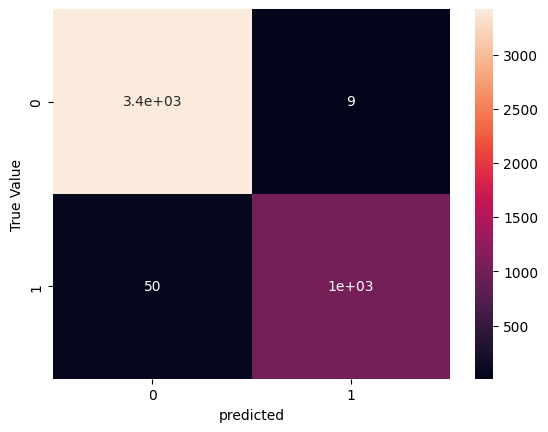

In [66]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('True Value')
plt.show()